In [51]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from datetime import datetime
from pathlib import Path
from notebooks.utils import  *
import networkx as nx
import matplotlib.pyplot as plt
import cdt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
project_root = get_git_root()
data_folder = "data"
datafile = "features.csv"
figsize = (10, 8)
font_graph = 10
font_color_graph = "black"

In [53]:
df = pd.read_csv(Path(project_root, data_folder, datafile))
# remove the ones for which even date is na
df = df.dropna(subset="day_survey")

In [54]:
num_prior_days = 10
date_covid = datetime(2020, 3, 1)
# rough date
date_vaccine = datetime(2021, 4, 1)

ema_dictionary = {
    "pam": "Y1",
    "phq2_score": "Y2",
    "phq4_score": "Y3",
    "gad2_score": "Y4",
    "social_level": "Y5",
    "sse_score": "Y6",
    "stress": "Y7",
}

physical_dictionary = {
    "P1": "excercise",
    "P2": "studying",
    "P3": "in house",
    "P4": "sports",
}
social_dictionary = {
    "S1": "traveling",
    "S2": "distance traveled",
    "S3": "time in social location",
    "S4": "visits",
    "S5": "duration unlocked phone in social locations",
    "S6": "frequency of unlocked phone in social locations",
    "S7": "motion at social locations",
}

sleep_dictionary = {
    "Z1": "sleep_duration",
    "Z2": "sleep start time",
    "Z3": "sleep end time",
}

features_dictionary = (
    physical_dictionary | social_dictionary | sleep_dictionary | ema_dictionary
)


ema = [f"Y{i}" for i in range(1, 8, 1)]
physical = [f"P{i}" for i in range(1, 5, 1)]
social = [f"S{i}" for i in range(1, 8, 1)]
sleep = [f"Z{i}" for i in range(1, 4, 1)]

In [55]:
df["date"] = pd.to_datetime(df["day_survey"])
df.rename(columns=ema_dictionary, inplace=True)
df.set_index(["uid", "date"], inplace=True)

In [56]:
outcome = ["Y1"]
subset = outcome + social
sdf = df.dropna(subset=ema + physical + social + sleep)[subset]
df = sdf

In [57]:
columns_to_check = outcome + social

In [58]:
check_all_float(df, columns_to_check)

In [59]:
glasso = cdt.independence.graph.Glasso()
# apply graph lasso to data
skeleton = glasso.predict(df)

PC is ran on the skeleton of the given graph.


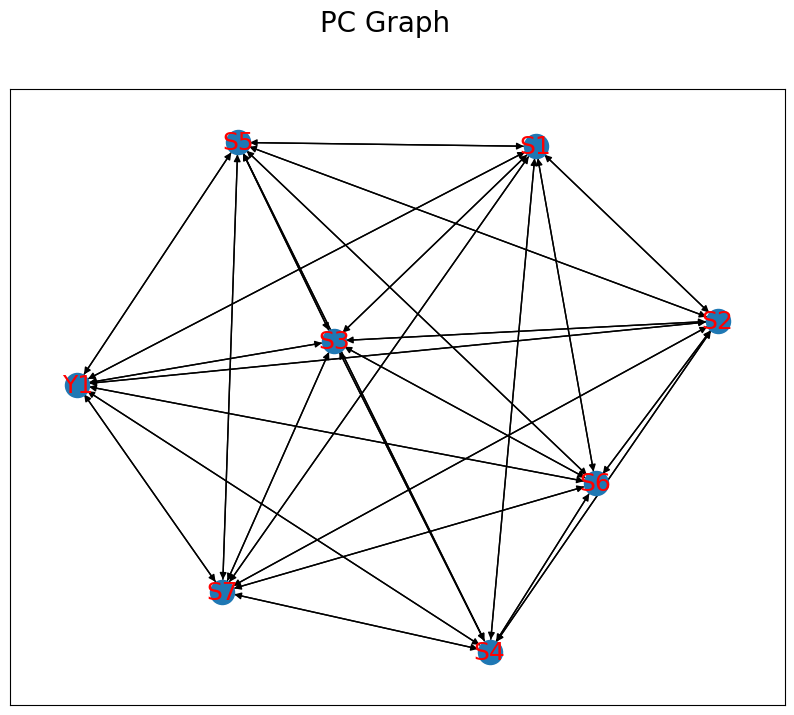

In [60]:
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df, skeleton)
# visualize network
fig = plt.figure(figsize=figsize)
fig.suptitle("PC Graph", fontsize=20)
nx.draw_networkx(graph_pc, font_size=18, font_color="r")

GES is ran on the skeleton of the given graph.


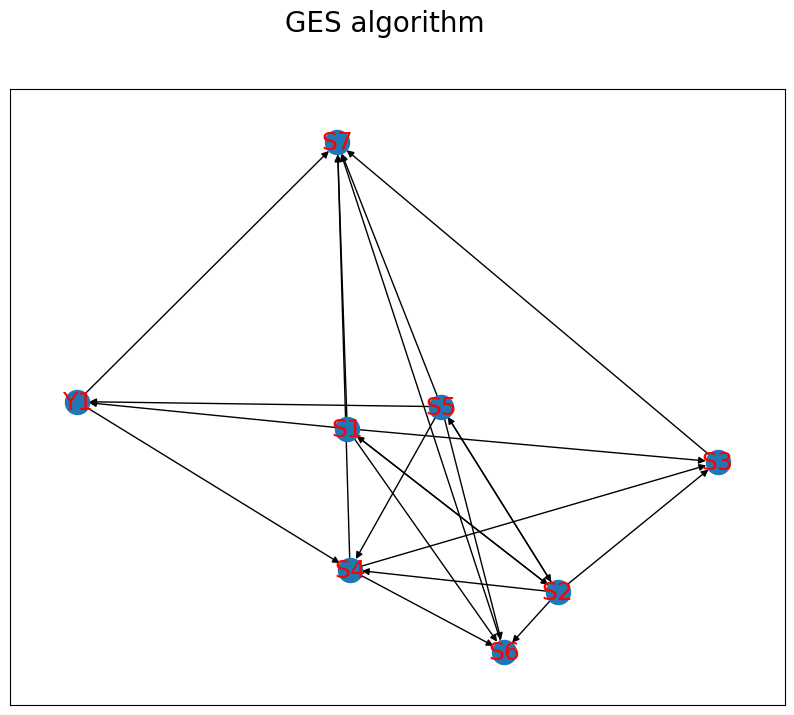

In [61]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges = model_ges.predict(df, skeleton)
# visualize network
fig = plt.figure(figsize=figsize)
fig.suptitle("GES algorithm", fontsize=20)
nx.draw_networkx(graph_ges, font_size=18, font_color="r")

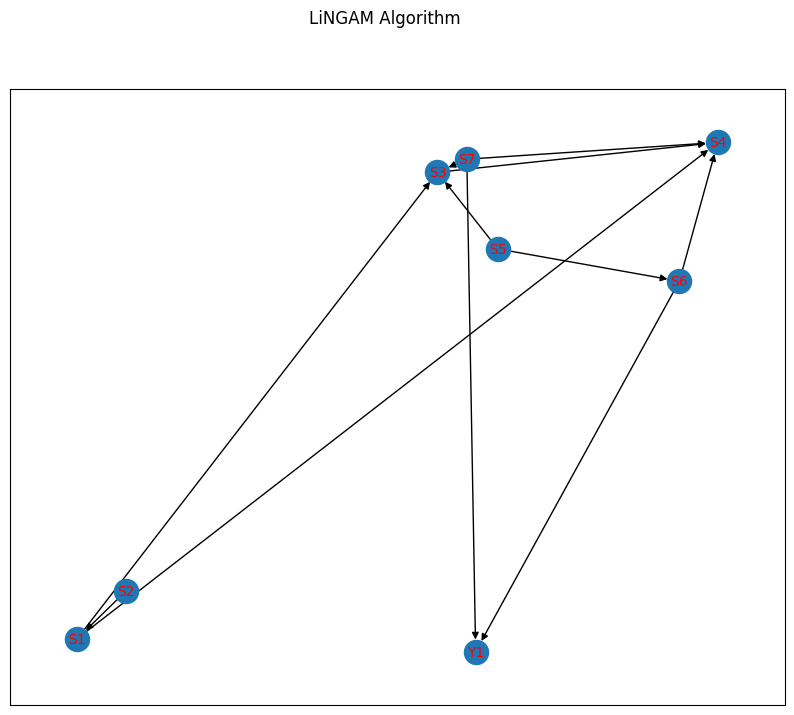

In [62]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig = plt.figure(figsize=figsize)
fig.suptitle("LiNGAM Algorithm")
nx.draw_networkx(
    graph_lingam, font_size=font_graph, font_color=font_color_graph
)

In [63]:
social_dictionary["S6"]

'frequency of unlocked phone in social locations'